## November 20

In [2]:
%matplotlib notebook
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import tarfile
import sqlite3
import lsst.daf.persistence as dafPersist

In [3]:
hitsDataDir='/epyc/users/mrawls/premap2019/hits-dr1'
hitsFilename='HiTS_DR1_variables_DM-dataset-subset.fits'
hitsFilepath=os.path.join(hitsDataDir,hitsFilename)
hitsTable=fits.open(hitsFilepath) # load data as an astropy fits thing
hitsDf=pd.DataFrame(hitsTable[1].data) # turn data into a pandas dataframe
hitsDf.head() # shows us what the dataframe looks like

,ID,internalID,raMedian,decMedian,Variable_prob,Periodic_prob,DSCT_Prob,EB_Prob,ROTVAR_Prob,RRLYR_Prob,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,g-i,g-r,r-i
0,HiTS095611+020452,Blind15A_26_N1_1715_0146,149.048038,2.081381,0.523601,0.202651,NaN,NaN,NaN,NaN,...,0.246009,-0.584446,0.134705,2.100608,0.032812,0.773151,0.738233,2.859381,1.439736,1.419645
1,HiTS095645+021135,Blind15A_26_N1_0181_2093,149.190225,2.193068,0.564932,0.635018,0.400,0.100,0.375,0.125,...,0.119267,-0.133774,0.067353,-0.444997,0.123052,0.841553,0.815632,0.996040,0.769289,0.226751
2,HiTS095652+023537,Blind15A_26_S14_1446_0379,149.220445,2.593841,0.962477,0.635836,0.025,0.125,0.750,0.100,...,0.227995,-0.317121,0.269410,-0.008631,0.067782,0.849505,0.846981,1.911452,1.484048,0.427403
3,HiTS095702+023628,Blind15A_26_S14_1253_0945,149.261780,2.607883,0.532390,0.933333,0.550,0.225,0.050,0.175,...,0.179956,-0.288333,0.067353,-1.067079,0.181790,0.853063,0.754798,NaN,NaN,NaN
4,HiTS095726+015556,Blind15A_26_N8_1496_2317,149.361376,1.932343,0.972280,0.889344,0.050,0.175,0.625,0.150,...,0.269737,-0.035972,0.740878,-1.731678,0.089139,0.957841,0.948092,1.185192,0.894064,0.291128


In [4]:
print(len(hitsDf))
hitsDf.columns

165


Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class', 'ID_feat',
       'raMedian_feat', 'decMedian_feat', 'Amplitude', 'AndersonDarling',
       'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau',
       'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0',
       'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2',
       'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0',
       'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2',
       'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0',
       'Fre

## Today's Goals
1. Access HiTS light curve data and plot it for at least one variable object.
2. Access LSST light curve data for the same object(s) and plot it too.

In [5]:
testRow=hitsDf.iloc[0]
tok = testRow['internalID'].split('_')
print(tok)
field = '_'.join([tok[0],tok[1]])
print(field)
ccd = tok[2]
lightcurveTestFile = field + '_' + ccd + '_LC_50.tar.gz'
lightcurveTestPath = os.path.join(hitsDataDir,'light_curves',field,ccd,lightcurveTestFile)
print(lightcurveTestPath)


['Blind15A', '26', 'N1', '1715', '0146']
Blind15A_26
/epyc/users/mrawls/premap2019/hits-dr1/light_curves/Blind15A_26/N1/Blind15A_26_N1_LC_50.tar.gz


In [6]:
def plot_hits(row,lcPath='/epyc/users/mrawls/premap2019/hits-dr1/light_curves'):
    '''Plot light curves from HiTS DR1.
    
    Parameters
    ----------
    row : Pandas Dataframe row from DR1 source data
    lcPath : Path on disk to light curves from DR1
    '''
    tok = row['internalID'].split('_')
    field = '_'.join([tok[0],tok[1]])
    ccd = tok[2]
    lightcurveFile = field + '_' + ccd + '_LC_50.tar.gz'
    tarball = tarfile.open(os.path.join(lcPath,field,ccd,lightcurveFile))
    data = tarball.extractfile(str(row['internalID'])+ '_g.dat')
    dfl = pd.read_csv(data,sep='\t') # lead a file with a light curve data into a pandas dataframe
    fig = plt.figure(figsize=(10,8))
    plt.errorbar(dfl.MJD,dfl.MAG_AP1,dfl.MAGERR_AP1, marker='o',linestyle=':')
    plt.xlabel('Time (MJD)')
    plt.ylabel('magnitude')

<IPython.core.display.Javascript object>


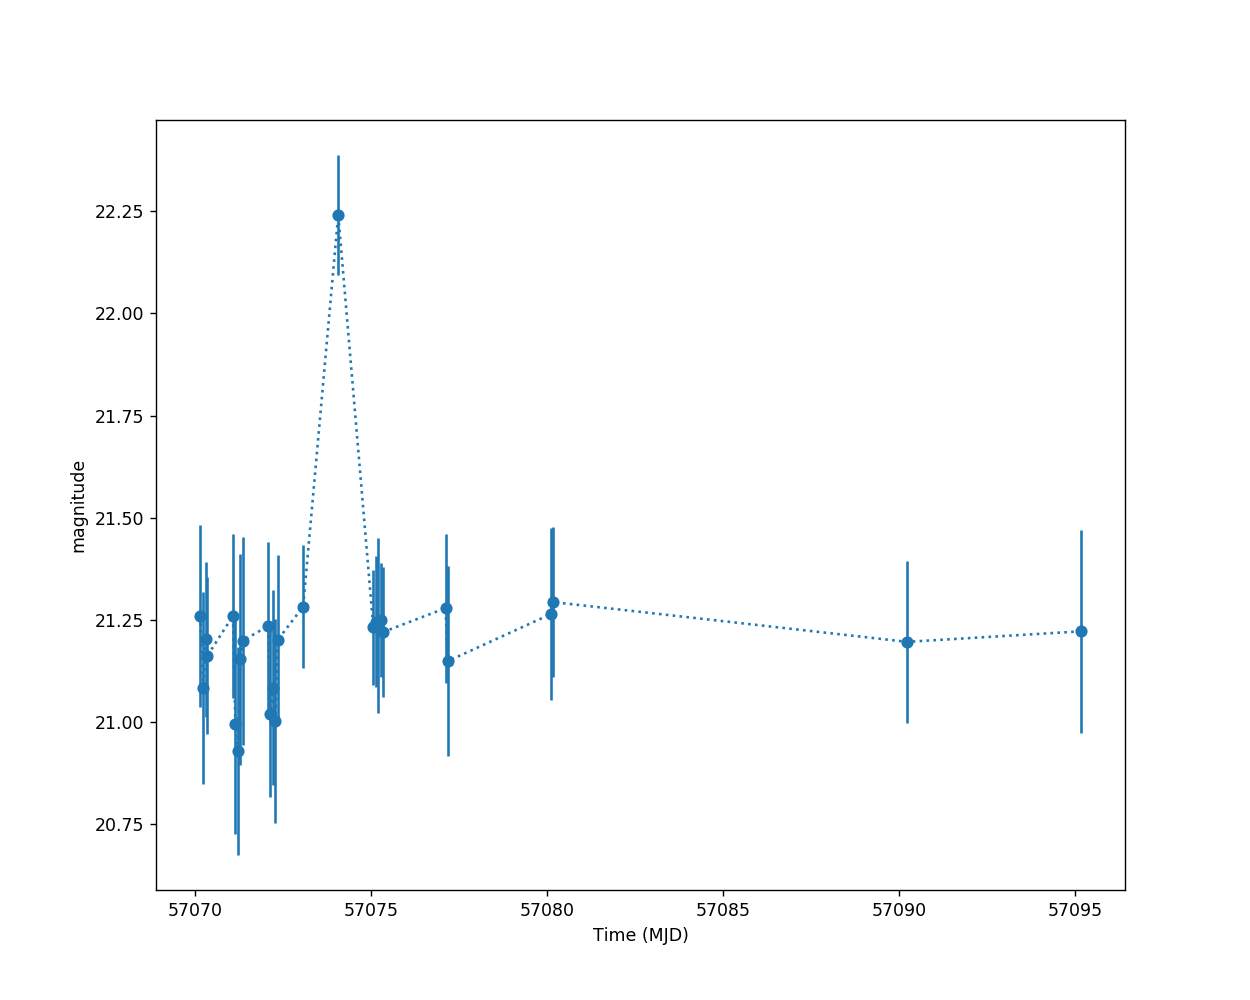

In [7]:
plot_hits(hitsDf.iloc[7])

We made it thorough part 1 of our goals! We have a function that we can use to plot any of the 165 HiTS DR1 variable
object light curves. We'll pick up from here next time.

## November 22

LSST Stuff!

In [8]:
repo = '/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1'
butler = dafPersist.Butler(repo)

In [9]:
dbName = 'association.db'
dbPath = os.path.join(repo, dbName)

In [10]:
connection = sqlite3.connect(dbPath)

In [11]:
objTable = pd.read_sql_query('select diaObjectId, ra, decl, nDiaSources, \
                              gPSFluxMean, gPSFluxMeanErr, \
                              validityEnd, flags, \
                              gTOTFluxMean, gTOTFluxMeanErr \
                              from DiaObject where validityEnd is NULL;', connection)

In [12]:
srcTableAll = pd.read_sql_query('select diaSourceId, diaObjectId, \
                                  ra, decl, ccdVisitId, \
                                  midPointTai, apFlux, psFlux, apFluxErr, \
                                  psFluxErr, totFlux, totFluxErr, flags \
                                  from DiaSource;', connection)

In [13]:
objTable.head()
#objTable.columns This one isn't as cool.

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,gPSFluxMeanErr,validityEnd,flags,gTOTFluxMean,gTOTFluxMeanErr
0,176486781787570292,151.197871,2.221515,1,NaN,NaN,None,1,-20630.955068,NaN
1,176486781787570326,150.997772,2.329394,1,160.158040,NaN,None,1,196.567166,NaN
2,176486781787570340,151.078542,2.322744,1,10953.513450,NaN,None,1,14866.415796,NaN
3,176486713068093591,149.839390,2.613432,1,2032.066961,NaN,None,1,2230.560014,NaN
4,176486713068093600,149.869474,2.552636,1,NaN,NaN,None,1,1788.147560,NaN


In [14]:
srcTableAll.head()

,diaSourceId,diaObjectId,ra,decl,ccdVisitId,midPointTai,apFlux,psFlux,apFluxErr,psFluxErr,totFlux,totFluxErr,flags
0,176486781787570292,176486781787570292,151.197871,2.221515,41091531,57070.141866,NaN,NaN,NaN,NaN,-20630.955068,315.430138,25299420
1,176486781787570293,176486781787570293,150.905711,2.283908,41091531,57070.141866,-4.100743e+04,-3.779699e+04,1103.226850,418.586689,48.563316,348.002515,25168348
2,176486781787570294,176486781787570294,150.909445,2.321916,41091531,57070.141866,-4.038756e+06,-3.395545e+06,1968.619372,1530.687159,-194.198280,383.644887,25166840
3,176486781787570295,176486781787570295,150.909175,2.355545,41091531,57070.141866,2.969476e+02,2.072557e+03,1060.795183,413.023842,8852.109173,403.754943,2536
4,176486781787570296,176486781787570296,150.910633,2.361792,41091531,57070.141866,-8.396924e+03,-1.138584e+04,1062.667154,450.717090,32932.733823,440.359122,25168332


In [15]:
sys.path.append('/epyc/users/mrawls/premap2019/ap_pipe-notebooks/')
from apdbPlots import makeSrcTableFlags

In [16]:
badFlagList = ['base_PixelFlags_flag_bad', 'base_PixelFlags_flag_suspect', 'base_PixelFlags_flag_saturatedCenter']

In [17]:
flagTable, flagValues, srcTableFlags, flagFilter, noFlagFilter, \
    goodSrc, goodObj = makeSrcTableFlags(srcTableAll, objTable)

/epyc/users/mrawls/lsst_stack/stack/miniconda3-4.5.12-f032070/Linux64/ap_association/18.1.0-14-g371438c+1/python/lsst/ap/association/mapApData.py:388: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  table_list = list(yaml.load_all(yaml_stream))


In [18]:
lsstRas = goodObj.ra
lsstDecs = goodObj.decl
hitsRas = hitsDf.raMedian_feat
hitsDecs = hitsDf.decMedian_feat

In [19]:
hitsCoords = SkyCoord(ra=hitsRas*u.degree, dec=hitsDecs*u.degree)
lsstCoords = SkyCoord(ra=lsstRas*u.degree, dec=lsstDecs*u.degree)
idx, d2d, d3d = hitsCoords.match_to_catalog_sky(lsstCoords)

In [20]:
idx 
#d2d This looks like RA
#d3d Not sure what this one is

array([23275, 13946, 38703, 11859, 37400,  7466, 22264, 30986, 35177,
       17819, 35180, 38621, 14858, 38394, 19642, 33543,  5618,  7250,
       26124, 12019,  5620, 13801, 11852,  4423, 37147, 38878, 11856,
       28509, 32548, 15050, 31216, 19544, 37528, 17790, 38535, 24220,
       29636,  1112, 35274, 37883, 38935, 38133,  4418, 19840,  7312,
       38058, 38045, 38660,  5780, 37761, 38470, 38504, 37721, 35266,
        1427, 26816, 40799, 14142, 31506, 12372, 12452, 34101,  4851,
       40408, 41545,  1396, 27768, 41709, 39382, 41681,  8892, 19108,
       20399, 10643, 15201, 41226, 43168, 18239, 41370, 25797, 19007,
       17005,  4937, 35334, 44044, 39285,  8362, 15211, 41237,  3927,
        4644, 40330,  3868, 36257, 44435, 39291, 41012, 43615,   717,
       40638, 45124, 44614,  6693, 31487, 41266, 42057, 31288, 44838,
       42051, 44860, 22561, 24612,  5166,   245, 42055, 11226, 36515,
       16150, 17043, 43855, 17165, 33894, 12943, 12757, 12469, 24685,
       15823, 40558,

In [21]:
goodObj.iloc[idx[2]]

diaObjectId        176510756295016607
ra                             149.22
decl                          2.59354
nDiaSources                        25
gPSFluxMean                  -140.081
gPSFluxMeanErr                123.453
validityEnd                      None
flags                               1
gTOTFluxMean                   157161
gTOTFluxMeanErr               123.892
Name: 96596, dtype: object

In [22]:
def plotLsstLightcurve(obj, dbPath, fluxCol='totFlux'):
    '''Plots a light curve for a DIA (Difference Image Analysis) Object
    from an LSST APDB (Alert Production database).
    
    Parameters
    ----------
    obj : diaObjectId
        a really long integer that lets us retrieve sources for a single object
    objTable : Pandas dataframe containing DIA Objects
    repo : Butler repository
    dbPath : Path on disk to an APDB we can load DIA Objects or DIA Sources from
        often the database is named `association.db`
    fluxCol : Which flux column to plot?
        choices are totFlux, psFlux, apFlux
    
    '''
    plt.figure(figsize=(10,8))
    connection = sqlite3.connect(dbPath)
    # Load all sources for a single object called "obj"
    srcTable = pd.read_sql_query(f'select diaSourceId, diaObjectId, \
                                  ra, decl, ccdVisitId, \
                                  midPointTai, apFlux, psFlux, apFluxErr, \
                                  psFluxErr, totFlux, totFluxErr, flags \
                                  from DiaSource where diaObjectId = {obj};', connection)
    fluxErrCol = fluxCol + 'Err'
    plt.errorbar(srcTable['midPointTai'], srcTable[fluxCol], yerr=srcTable[fluxErrCol],
                 ls=':', marker='o')
    plt.ylabel(fluxCol + ' (nJy)')
    plt.xlabel('Time (MJD)')

<IPython.core.display.Javascript object>


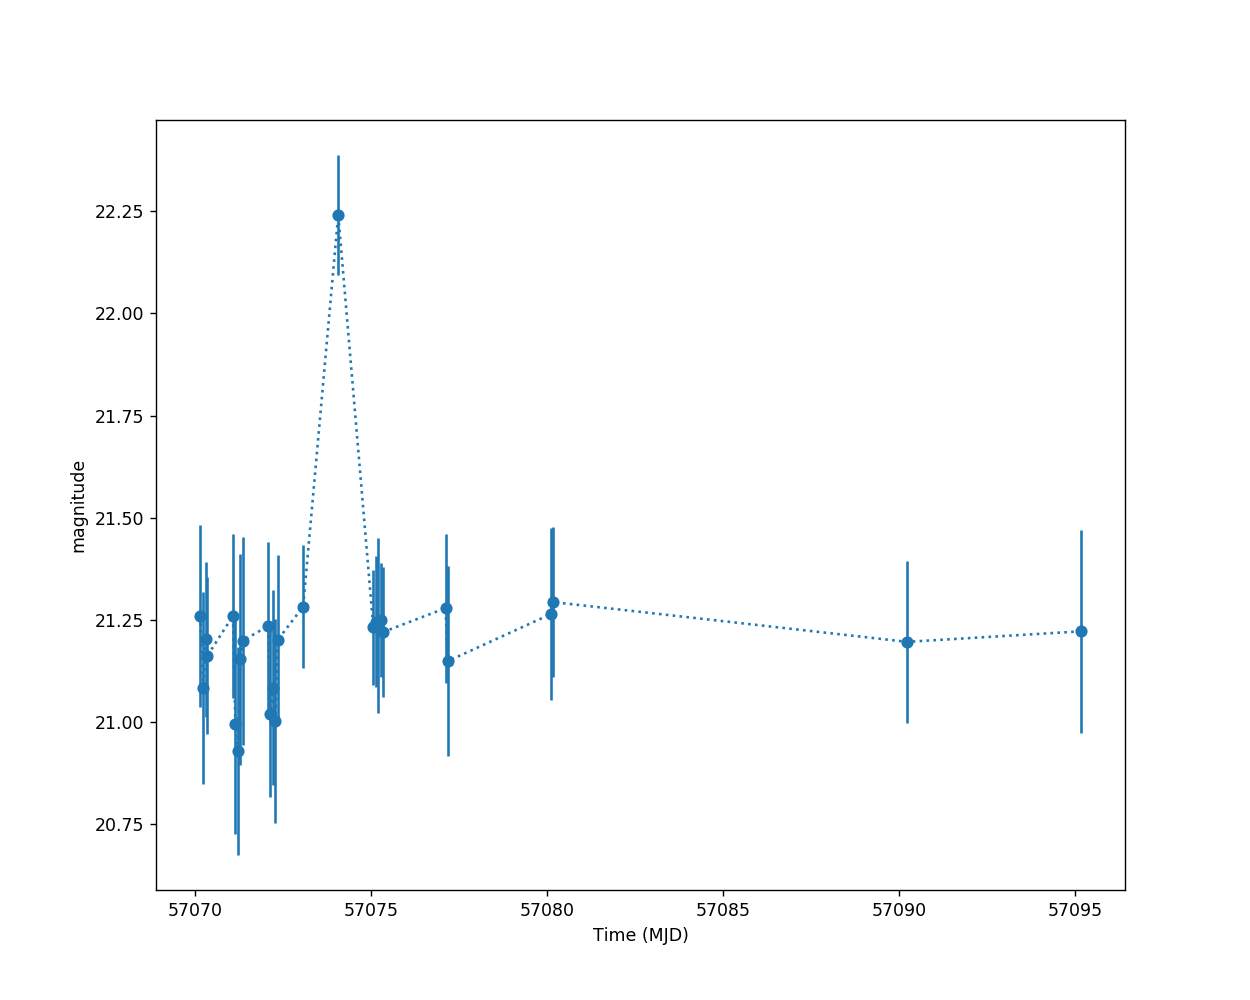

In [23]:
plot_hits(hitsDf.iloc[7])

<IPython.core.display.Javascript object>


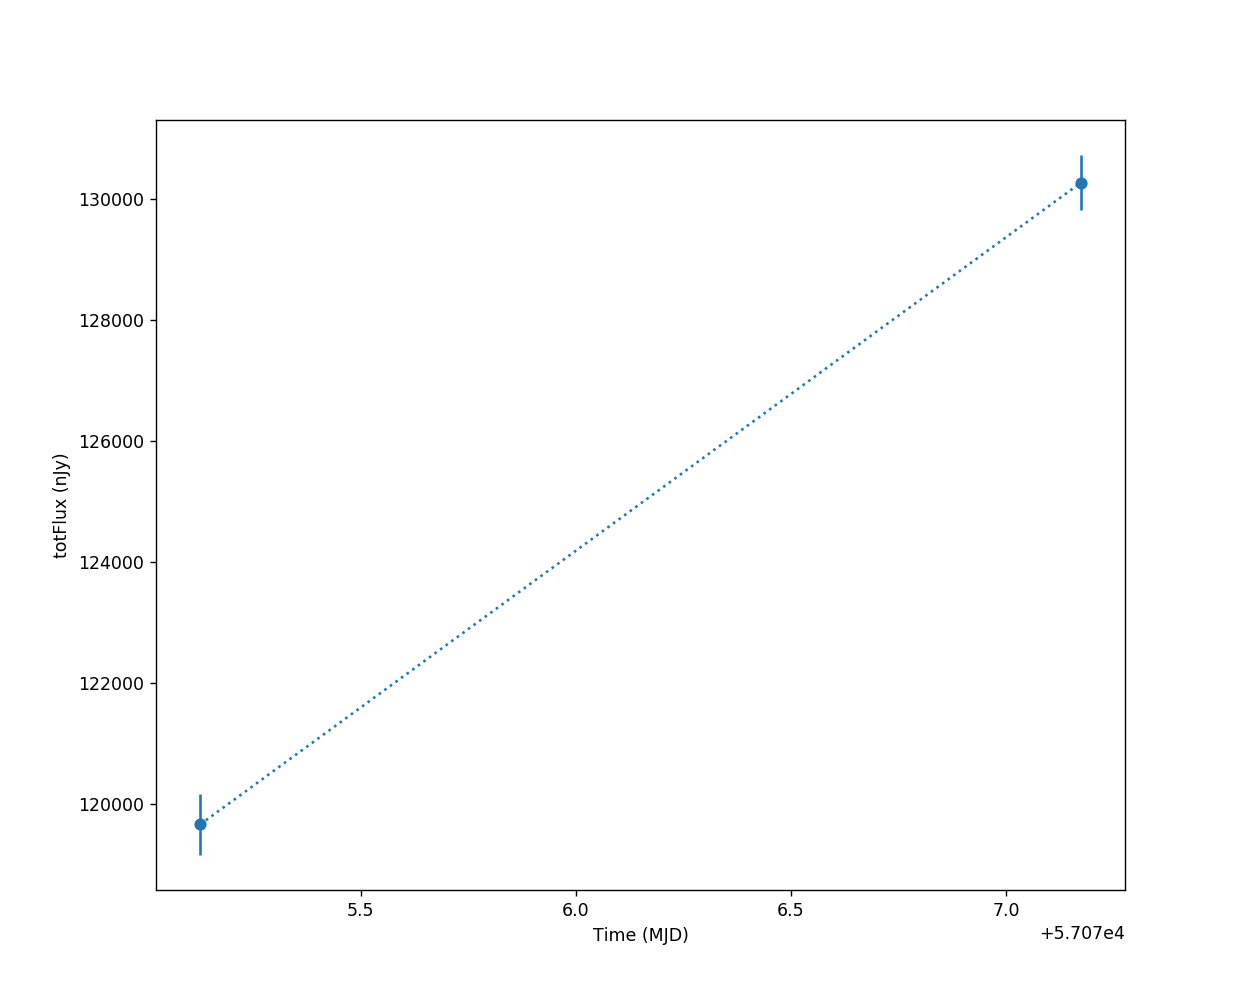

In [24]:
obj = goodObj.iloc[idx[7]]['diaObjectId']  # can you explain what this line does?
plotLsstLightcurve(obj, dbPath)

goodObj is a table corresponding to the HiTS table that has had the flags applied and bad sources removed. So this cell is plotting the column and row in the goodObj table that corresponds to the HiTS table that we plotted above.

Are these two plots of the same light curve? They look significantly different. Also, should we be inverting the axes for the HiTS plot?

## My Adventure

We need to convert flux to magnitudes or vice versa.

In [25]:
lsstTestMag = (140000*u.nJy).to(u.ABmag)
print(lsstTestMag.value) # this looks like converting between flux to magnitude.

18.5346799108044


In [26]:
srcTableArray = np.array(srcTableAll['totFlux'])
mag = (srcTableArray*u.nJy).to(u.ABmag)

magErr = np.abs(-1.0857/srcTableAll['totFluxErr']/srcTableAll['totFlux'])
    

/epyc/users/mrawls/lsst_stack/python/miniconda3-4.5.12/envs/lsst-scipipe-f032070/lib/python3.7/site-packages/astropy/units/function/logarithmic.py:43: RuntimeWarning: invalid value encountered in log10
  return dex.to(self._function_unit, np.log10(x))


In [37]:
srcTableAll['magCol'] = mag
srcTableAll['magErrCol'] = magErr

In [35]:
def plotLsstHitsLightCurve(obj, srcTable, row, lcPath='/epyc/users/mrawls/premap2019/hits-dr1/light_curves'):

    plt.figure(figsize=(8,6))
   
    
    srcRowFilter = (srcTable['diaObjectId'] == obj)
    srcRow = srcTable.loc[srcRowFilter]
    
    plt.errorbar(srcRow['midPointTai'], srcRow['magCol'], yerr=srcRow['magErrCol'],
                 ls=':', marker='o')
    
    tok = row['internalID'].split('_')
    field = '_'.join([tok[0],tok[1]])
    ccd = tok[2]
    lightcurveFile = field + '_' + ccd + '_LC_50.tar.gz'
    tarball = tarfile.open(os.path.join(lcPath,field,ccd,lightcurveFile))
    data = tarball.extractfile(str(row['internalID'])+ '_g.dat')
    dfl = pd.read_csv(data,sep='\t') # lead a file with a light curve data into a pandas dataframe
    plt.errorbar(dfl.MJD,dfl.MAG_AP1,dfl.MAGERR_AP1, marker='o',linestyle=':')
    
    plt.ylabel('Apparent Magnitude')
    plt.xlabel('Time (MJD)')

<IPython.core.display.Javascript object>


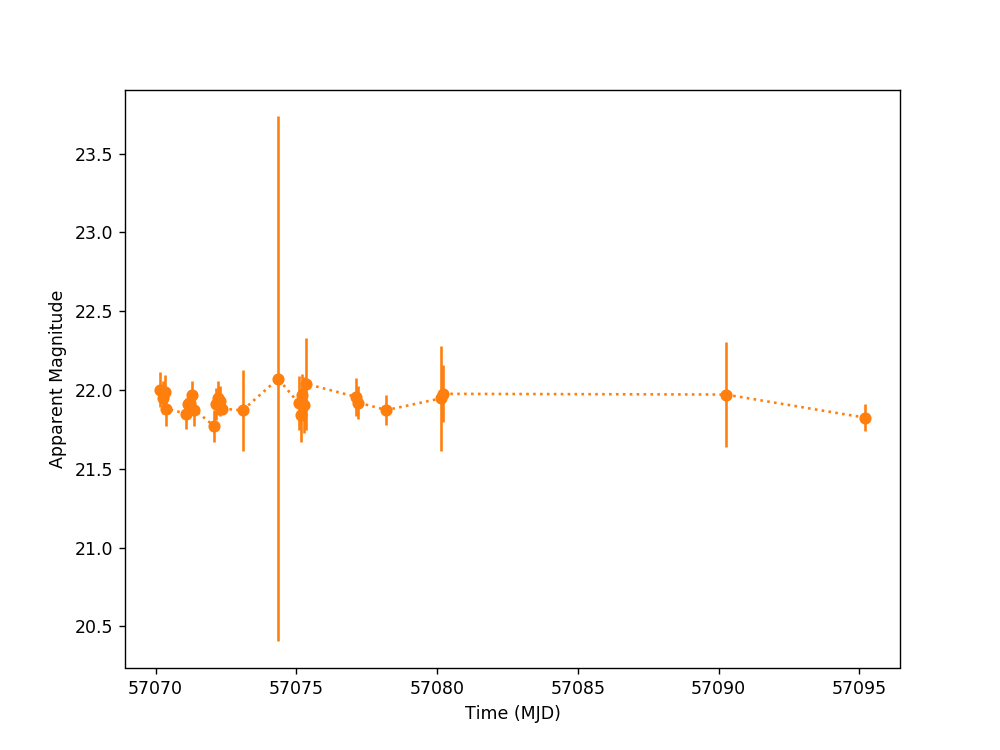

In [38]:
obj = goodObj.iloc[idx[102]]['diaObjectId']
row = hitsDf.iloc[102]
plotLsstHitsLightCurve(obj, srcTableAll, row)

I'm stuck on plotting the magCol data. I think I would have to modify the function, but I can't get it to work.

## Plotting Objects on the Sky

In [30]:
goodObj.head()

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,gPSFluxMeanErr,validityEnd,flags,gTOTFluxMean,gTOTFluxMeanErr
1,176486781787570326,150.997772,2.329394,1,160.158040,NaN,None,1,196.567166,NaN
3,176486713068093591,149.839390,2.613432,1,2032.066961,NaN,None,1,2230.560014,NaN
9,176486713068093630,149.981189,2.595150,1,24405.746554,NaN,None,0,24312.714149,NaN
14,176486713068093657,150.077073,2.664453,1,1892.355900,NaN,None,1,1880.502294,NaN
18,176486854802014318,150.156031,1.788118,1,2658.582650,NaN,None,1,2789.874153,NaN


In [31]:
ax1Filter = (goodObj['decl']>-2)
ax2Filter=(~ax1Filter)

ra1_first=goodObj.loc[ax1Filter, 'ra']
dec1_first=goodObj.loc[ax1Filter, 'decl']
ra2_first=goodObj.loc[ax2Filter, 'ra']
dec2_first=goodObj.loc[ax2Filter, 'decl']

ax1Filter_second = (hitsDf['decMedian']>-2)
ax2Filter_second = (~ax1Filter_second)

ra1_second=hitsDf.loc[ax1Filter_second,'raMedian']
dec1_second=hitsDf.loc[ax1Filter_second,'decMedian']
ra2_second=hitsDf.loc[ax2Filter_second,'raMedian']
dec2_second=hitsDf.loc[ax2Filter_second,'decMedian']

In [32]:
def plot_objects_on_sky(ra1_first, dec1_first,
                        ra2_first, dec2_first,
                        ra1_second, dec1_second,
                        ra2_second, dec2_second):
    """This function takes two sets of RA and Dec and plots them
    both on the sky in different colors.
    
    It is customized to plot a specific region (three HiTS fields in two panels).
    
    "1" and "2" refer to the two panels in the plot.
    "first" and "second" refer to the two different datasets.
    """
    # Set up the figure object and two axes
    fig = plt.figure(figsize=(13, 13))
    ax1 = plt.subplot2grid((100, 100), (0, 55), rowspan=50, colspan=45)
    ax2 = plt.subplot2grid((100, 100), (0, 0), rowspan=90, colspan=50)

    # Plot the first set of RAs and Decs in blue
    # This will be from the LSST database
    ax1.scatter(ra1_first, dec1_first, marker='.', s=0.5, alpha=0.5, c='C0',label='LSST')
    ax2.scatter(ra2_first, dec2_first, marker='.', s=0.5, alpha=0.5, c='C0',label='LSST')
    
    # Plot the second set of RAs and Decs in red
    # This will be from the HiTS DR1
    ax1.scatter(ra1_second, dec1_second, marker='.', s=10, alpha=0.8, c='red',label='HiTS')
    ax2.scatter(ra2_second, dec2_second, marker='.', s=10, alpha=0.8, c='red',label='HiTS')

    ax1.invert_xaxis()
    ax2.invert_xaxis()

    plt.xlabel('RA (deg)', fontsize=14)
    plt.ylabel('Dec (deg)', fontsize=14)
    plt.title('View of Objects from LSST and HiTS on the Sky', fontsize=15.5)
    
    ax1.tick_params(axis='both', which='major', labelsize=11.5)
    ax1.tick_params(axis='both', which='minor', labelsize=11.5)

    ax2.tick_params(axis='both', which='major', labelsize=11.5)
    ax2.tick_params(axis='both', which='minor', labelsize=11.5)
    
    lgnd = ax1.legend(loc="lower right", scatterpoints=1, fontsize=10, prop={'size': 11.5})
    lgnd.legendHandles[0]._sizes = [60]
    lgnd.legendHandles[1]._sizes = [60]
    
    lgnd2 = ax2.legend(loc="lower right", scatterpoints=1, fontsize=10, prop={'size': 11.5})
    lgnd2.legendHandles[0]._sizes = [60]
    lgnd2.legendHandles[1]._sizes = [60]

<IPython.core.display.Javascript object>


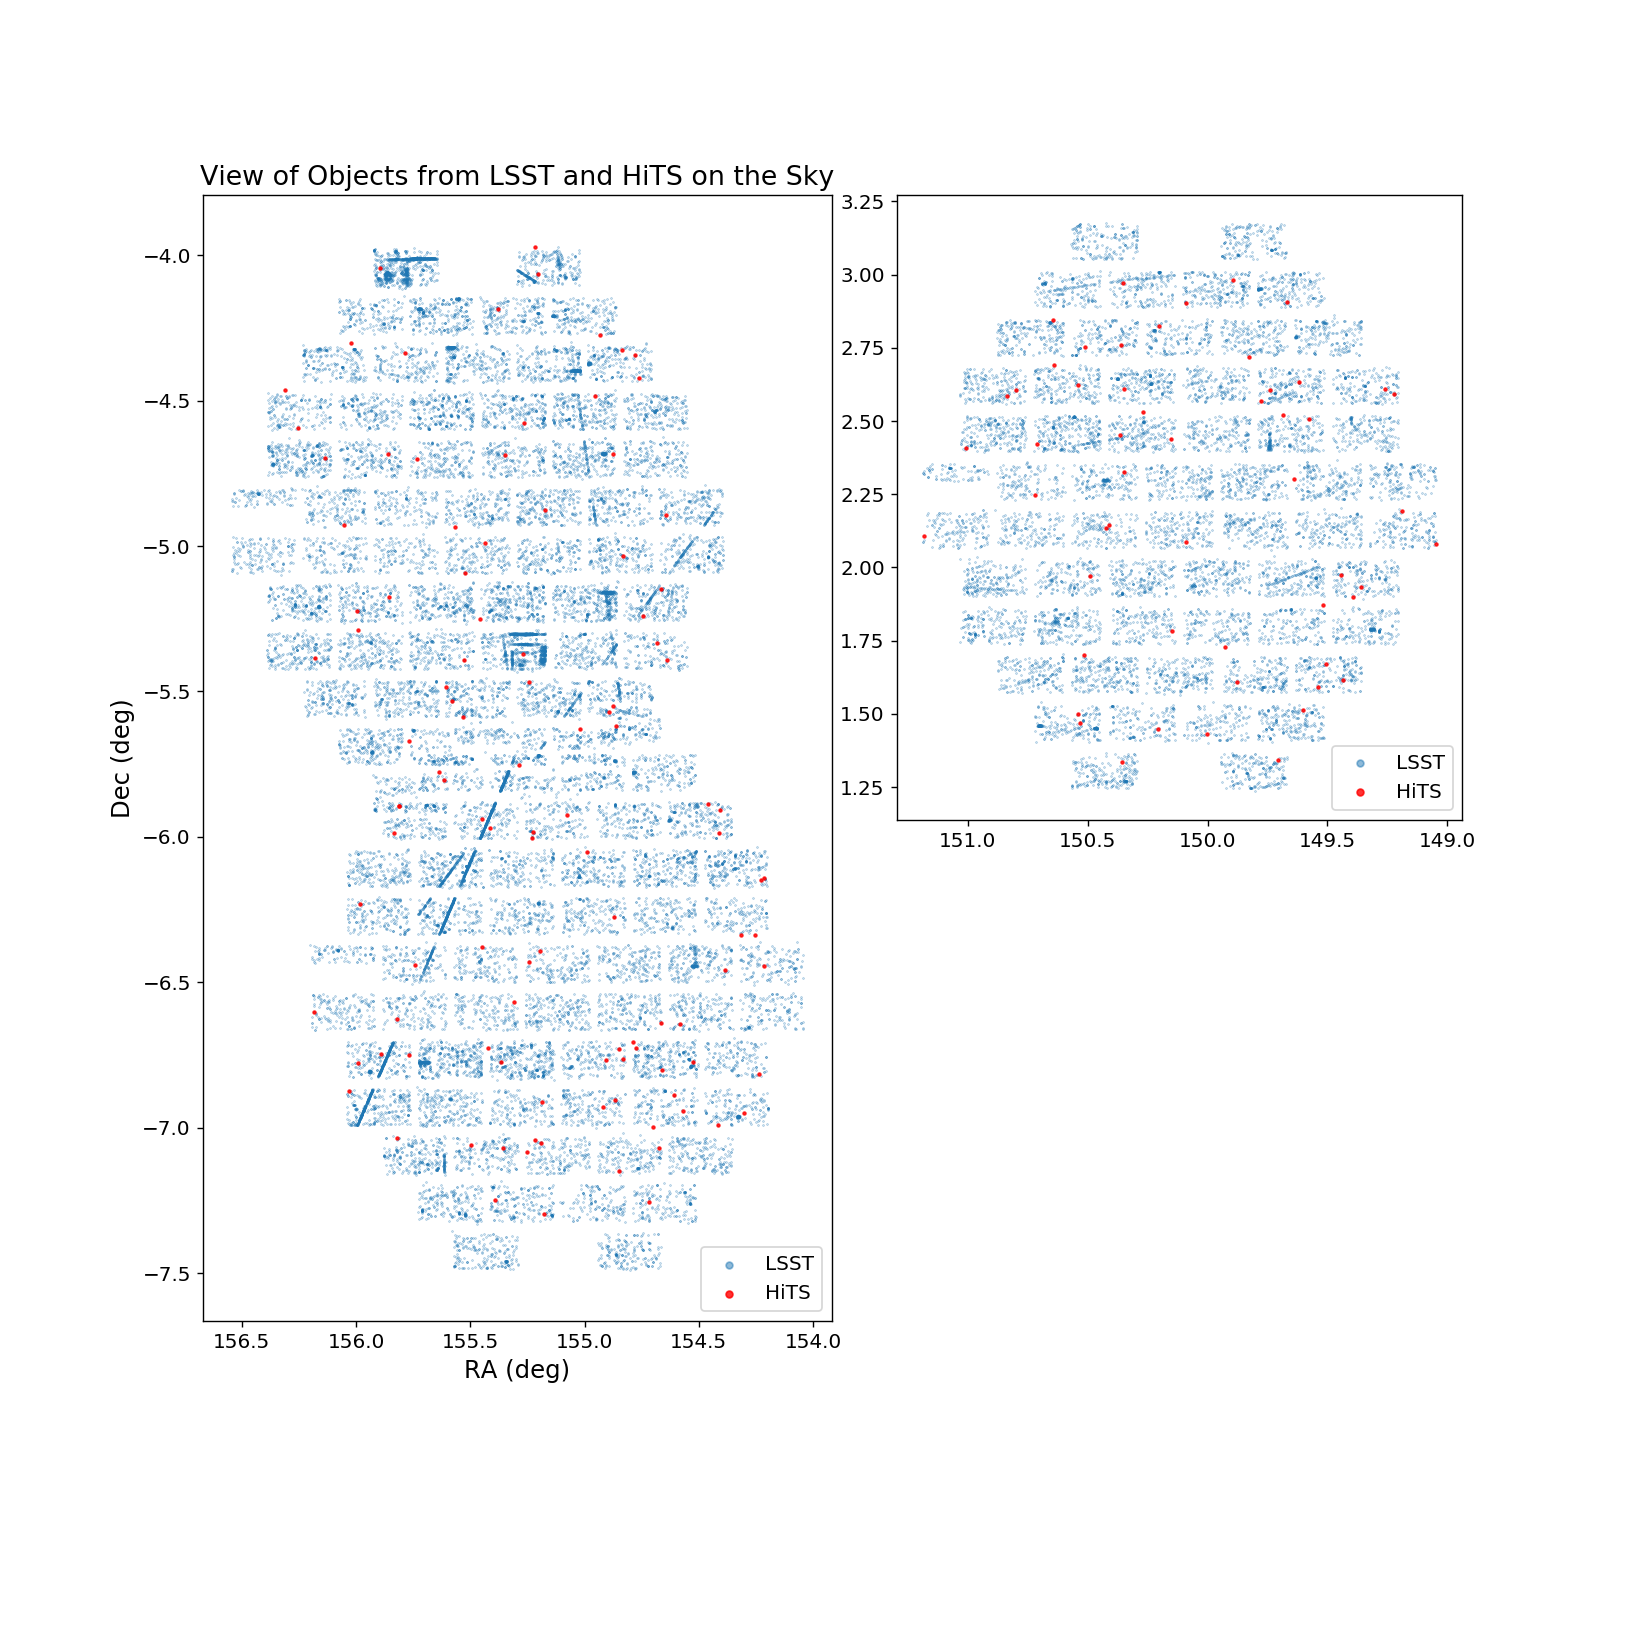

In [33]:
plot_objects_on_sky(ra1_first, dec1_first,
                        ra2_first, dec2_first,
                        ra1_second, dec1_second,
                        ra2_second, dec2_second)

In [34]:
goodObj.head()

,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,gPSFluxMeanErr,validityEnd,flags,gTOTFluxMean,gTOTFluxMeanErr
1,176486781787570326,150.997772,2.329394,1,160.158040,NaN,None,1,196.567166,NaN
3,176486713068093591,149.839390,2.613432,1,2032.066961,NaN,None,1,2230.560014,NaN
9,176486713068093630,149.981189,2.595150,1,24405.746554,NaN,None,0,24312.714149,NaN
14,176486713068093657,150.077073,2.664453,1,1892.355900,NaN,None,1,1880.502294,NaN
18,176486854802014318,150.156031,1.788118,1,2658.582650,NaN,None,1,2789.874153,NaN
